In [2]:
import pandas as pd

In [3]:
house=pd.read_csv('USA_Housing.csv')
house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
x=house.drop(['Address','Price'],axis=1)
y=house.Price
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, test_size=0.3, random_state=42)#80% training , 20% test data
print("Size of x and its training and testing data is: ",x.shape, x_train.shape, x_test.shape)
print("Size of x and its training and testing data is: ",y.shape, y_train.shape, y_test.shape)

Size of x and its training and testing data is:  (5000, 5) (3500, 5) (1500, 5)
Size of x and its training and testing data is:  (5000,) (3500,) (1500,)


In [5]:
house.shape

(5000, 7)

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
gdbr=GradientBoostingRegressor(max_depth=3,n_estimators=100,learning_rate=0.1)
gdbr.fit(x_train, y_train)
y_pred=gdbr.predict(x_test)

In [7]:
print('Accuaracy of model on testing is: ',r2_score(y_pred,y_test))

Accuaracy of model on testing is:  0.882454956310005


In [8]:
y_pred1=gdbr.predict(x_train)
print('Accuaracy of model on testing is: ',r2_score(y_pred1,y_train))

Accuaracy of model on testing is:  0.9209972028447049


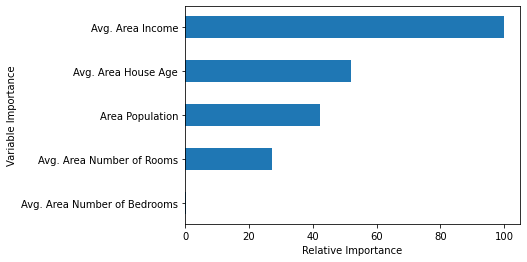

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,5))
feature_importance=gdbr.feature_importances_
feature_importance=100.0*(feature_importance/feature_importance.max())
sort_idx=np.argsort(feature_importance)
pos = np.arange(sort_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sort_idx], align='center',height=0.5)
plt.yticks(pos, house.columns[sort_idx])
plt.xlabel('Relative Importance')
plt.ylabel('Variable Importance')
plt.show()

In [10]:
from sklearn.model_selection import RandomizedSearchCV
parameter={'max_depth':[1,2,3,4,6,7,8],'n_estimators':[100,200,300,400,500,600,700],'learning_rate':[0.1,0.2,0.5,0.05,0.005]}
new_model=RandomizedSearchCV(estimator=gdbr,param_distributions=parameter,scoring='r2')
new_model.fit(x_train,y_train)
pred_y=new_model.predict(x_test)
print('Accuracy of model on testing data is: ',accuracy_score(pred_y,y_test))

Accuracy of model on testing data is:  [1288360.82927683 1276168.8772158  1224333.59713487 ... 1466565.66689991
 1461527.72987968 1010439.24888838] 1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
3563    1.348222e+06
1538    1.309937e+06
1837    1.472887e+06
2380    1.409762e+06
1912    1.009606e+06
Name: Price, Length: 1500, dtype: float64


In [11]:
print(new_model.best_params_)
print('Best Score is: ',new_model.best_score_)

{'n_estimators': 300, 'max_depth': 1, 'learning_rate': 0.2}
Best Score is:  0.9105109558637325


In [12]:
y_pred1=gdbr.predict(x_train)
print('Accuaracy of model on testing is: ',r2_score(y_pred1,y_train))

Accuaracy of model on testing is:  0.9209972028447049
